In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "/content/drive/MyDrive/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.4 MB/s eta 0:00:00


In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [5]:
skincare = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어_소분류.csv")
skincare

,상품대분류,상품중분류,상품소분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,모이스처라이징,에센스 & 세럼,아이오페,레티놀 엑스퍼트 0.1%,nice****,5,2022.03.11,40대,여성,극건성,탄력없음,"1년정도 피부에 스킨정도만 바른피부 (재택근무,수술후유증,얼굴 핥는걸 좋아하는 강아..."
1,스킨케어,모이스처라이징,에센스 & 세럼,아이오페,레티놀 엑스퍼트 0.1%,sooj*****,5,2022.05.31,30대,여성,수분부족지성,모공,레티놀 늘 보기만 하고 사는건 망설이고 고민했었어요. 부작용도 있다고 하고 그리고 ...
2,스킨케어,모이스처라이징,에센스 & 세럼,아이오페,레티놀 엑스퍼트 0.1%,jejj****,5,2021.10.29,20대,여성,수분부족지성,모공,"코랑 코옆 나비존에 블랙헤드가 많은 편이었는데, 마스크 쓰니까 모공이 더 커지는 것..."
3,스킨케어,모이스처라이징,에센스 & 세럼,아이오페,레티놀 엑스퍼트 0.1%,inse*****,5,2022.05.17,30대,여성,건성,주름,"작년에 아리따움 직원분 추천으로 구매해서, 한개 사용해봤는데, 사용감이 너무 좋았어..."
4,스킨케어,모이스처라이징,에센스 & 세럼,아이오페,레티놀 엑스퍼트 0.1%,rjde***,5,2021.09.23,30대,여성,극건성,탄력없음,20대 아이오페 바이탈라인을 접하면서도 아이크림은 귀찮아서 쓰지도 않았어요. 30대...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140785,스킨케어,클렌징,필링 & 스크럽,홀리추얼,래디언스 리설페이싱 필,pmj9***,5,2023.04.04,50대 이상,여성,복합성,칙칙함,세안후 다시 리설페이싱 필스텝으로닦아주면 다음날아침에일어나도너무나촉촉하니좋아요 맑고...
140786,스킨케어,클렌징,필링 & 스크럽,홀리추얼,래디언스 리설페이싱 필,espo***,5,2023.04.04,40대,여성,중성,모공,정말 좋은 제품이네요. 편리함 윤광 결정리에 이만한게 없어요 추천합니다
140787,스킨케어,클렌징,필링 & 스크럽,홀리추얼,래디언스 리설페이싱 필,alma***,5,2023.03.22,40대,여성,건성,건조함,추천으로 전에 썼는데 각질도 잘잡아주고 건조한것도 없어서 이번에 행사하길래 구매했어요
140788,스킨케어,클렌징,필링 & 스크럽,홀리추얼,래디언스 리설페이싱 필,ryj8*,4,2023.03.07,30대,여성,건성,민감성,제형이 엄청 묽은데도 피부에 닿아서 시간이 지나면 흡수가 되서 촉촉해져요 사용 후 ...


In [ ]:
makeup = pd.read_csv(f"{DATA_PATH}아모레크롤링_메이크업_완료.csv")
makeup

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,메이크업,헤라,블랙 쿠션 SPF34/PA++,clas********,5,2022.05.15,30대,여성,지성,칙칙함,신랑의 인생템이예요. 전에 체험단 이벤트로 27n1컬러를 처음 만났는데 21호 쓰는...
1,메이크업,헤라,블랙 쿠션 SPF34/PA++,drea*****,5,2022.02.06,50대 이상,여성,지성,트러블,명불허전 헤라 블랙쿠션!! 왜 입소문이 자자한지 써보면 압니다. 이번에 리뉴얼 되었...
2,메이크업,헤라,블랙 쿠션 SPF34/PA++,tlsd********,5,2022.10.10,30대,여성,복합성,민감성,민감여드름 복합성피부 30대여자입니다. 블랙쿠션은 이름만 많이들었지 구매한건 이번이...
3,메이크업,헤라,블랙 쿠션 SPF34/PA++,dbsd********,5,2021.05.11,20대,여성,복합성,민감성,사실 처음엔 가격때문에 살까말까 고민이 많았던 제품이었어요. 다들 좋다고는 하는데 ...
4,메이크업,헤라,블랙 쿠션 SPF34/PA++,mksa******,5,2022.01.15,40대,여성,건성,칙칙함,피부는 밝은편인데 악건성에 칙칙 노란끼 홍조 있어요 나이가 들어서 무조건 커버력이라...
...,...,...,...,...,...,...,...,...,...,...,...
37260,메이크업,세잔느,내추럴치크N 3.5g,ghkd*****,5,2019.05.07,30대,여성,수분부족지성,주름,사랑스런 라벤더핑크 우체국택배로 작은 상자로 왔어요. 상자를 뜯어보니 비닐에 싸여 ...
37261,메이크업,세잔느,내추럴치크N 3.5g,true*****,4,2019.05.06,40대,여성,수분부족지성,모공,여리여리한 발색 제 품의 설명이 한국어로 된건 비닐 포장 밖에 적혀있어요. 그러다 ...
37262,메이크업,세잔느,내추럴치크N 3.5g,kaec****,5,2019.05.02,30대,여성,수분부족지성,칙칙함,색상이 많이 진할까 걱정했는데 조심히 바르면 아주 이뻐요!!!
37263,메이크업,세잔느,내추럴치크N 3.5g,wjdg*******,4,2019.04.27,20대,여성,복합성,건조함,발색짱짱 뚜둥!ㅎㅎ 드디어 왔습니다 ㅎㅎ 두근두근 하늘아래 같은색은 없죠? 색이 영...


In [ ]:
food = pd.read_csv(f"{DATA_PATH}뷰티푸드 별점.csv")
food

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,mimi**,5,2023.08.24,30대,여성,건성,건조함,여름휴가철을 앞두고 몸매관리에 필요성을 느껴서 어디껄 살까 고민하다가 마침 전에 증...
1,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,yooy****,5,2023.08.22,40대,여성,복합성,모공,아직 복용전 입니다. 메타그린 먹고 있어서 함께 사용하려고 구입 했습니다.
2,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,n199**,5,2023.08.21,30대,여성,복합성,트러블,아무래도 가격이 있는 편이라 좀 부담스럽긴 하지만 원래 제품을 꾸준히 먹고 도움 받...
3,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,n199**,4,2023.08.21,30대,여성,복합성,트러블,저는 운동이랑 식단 병행하면서 도움 받았어요. 유지어터라 그럴 수도 있지만 살을 빼...
4,뷰티푸드,바이탈뷰티,메타그린 부스터샷 7일,dlfw*****,4,2023.08.19,30대,여성,건성,건조함,먹은지 며칠 안돼서 효과는 잘 모르겠으나 먹기 간편해서 좋고 맛있네요ㅎㅎ
...,...,...,...,...,...,...,...,...,...,...,...
33057,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,iamj***,5,2022.03.14,40대,남성,중성,건조함,[바이탈뷰티] [프리미엄 라인] 프로바이오 골드(30일) 프로바이오 골드 30일
33058,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,daki**,5,2020.05.18,40대,여성,NaN,NaN,유산균 찾아보다가 알게된상품 인데 좋은듯 합니다.
33059,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,grea*******,5,2019.09.06,30대,남성,NaN,NaN,항상 즐거운 마음으로 먹고 있습니다. 인생템 짱입니다!!
33060,뷰티푸드,바이탈뷰티,프로바이오틱스 골드,ylov****,4,2019.09.06,40대,여성,NaN,NaN,제품 바뀌고나서는 증정품먹어보고 구매합니다.먹고 호과좋왔음 좋겠네요.


In [ ]:
perfume = pd.read_csv(f"{DATA_PATH}향수 별점.csv")
perfume

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.10.01,30대,여성,NaN,NaN,구매시점이었던 여름부터 아주 잘 사용하고 있습니다! 향은 에스쁘아 특유의 꽃향기 같...
1,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.12.23,30대,여성,NaN,NaN,외출할 때마다 항상 사용하는 고체향수입니다! 한 달 전 재구매한 것은 아직 안뜯었고...
2,향수,에스쁘아,케익 프레그런스 2.5g,dmswls89,5,2022.08.25,30대,여성,NaN,NaN,"예전에, 정말 예~전에 에스쁘아 고체 향수 써보고 오랜만에 구입해봤습니다. 에스쁘아..."
3,향수,에스쁘아,케익 프레그런스 2.5g,Good******,5,2022.06.15,50대 이상,여성,NaN,NaN,제품을받고 제일먼저 매우 좋다는 탄성이 나오게 됩니다.조금도 아쉬움이 없는 예쁘고 ...
4,향수,에스쁘아,케익 프레그런스 2.5g,shin******,5,2022.11.05,50대 이상,여성,NaN,NaN,저렇게 이렇게 노력하고 또 노력해서 모으고 모은 뷰티포인트와 기프트카드로 수많은 제...
...,...,...,...,...,...,...,...,...,...,...,...
2860,향수,구딸,스 수와 우 자메 EDP,ymon*,5,2021.06.30,30대,여성,NaN,NaN,전형적인 장미향이에요. 요즘 유행하는 풀냄새까지 섞인 장미향도 아니고 로스폼퐁처럼 ...
2861,향수,구딸,스 수와 우 자메 EDP,empt*****,5,2022.12.14,30대,여성,NaN,NaN,"장미향은 처음인데 매우 마음에 듭니다 잎, 줄기의 풀 냄새가 섞이지 않은 장미꽃잎만..."
2862,향수,구딸,스 수와 우 자메 EDP,나나낭니,5,2022.09.14,30대,여성,NaN,NaN,장미향은 많은데 달달하지 않은 향 찾고 있었거든요. 디퓨저로 써도 좋을듯한 향이...
2863,향수,구딸,스 수와 우 자메 EDP,saga****,5,2022.06.27,30대,여성,NaN,NaN,"머스키한 센슈얼함이 있어, 선선한 계절에 잘 어울려요. 따끈한 날씨에 뿌리면 술에 ..."


In [ ]:
thing = pd.read_csv(f"{DATA_PATH}소품도구 별점.csv")
thing

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,ogy4***,2,2021-10-29,20대,여성,NaN,NaN,-디자인 *5점 만점 기준* -디자인 : 퍼프 위의 가죽 느낌으로 고급스러움과 ...
1,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,bjhd**,5,2022-02-17,30대,남성,NaN,NaN,좋아요! 최고에요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,kitt*****,5,2022-07-19,20대,여성,NaN,NaN,퍼프는 빨아서 사용하는 것도 찝찝하고 블랙쿠션에는 블랙쿠션 퍼프가 딱이라고 생각해서...
3,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,sjji****,5,2021-08-14,50대 이상,여성,NaN,NaN,퍼프가 발림성이 정말로 쫀쫀해요 쫀쫀 ! 두 개의 퍼프가 비닐과 pvc백에 이중 포...
4,소품도구,헤라,블랙 쿠션 제로-비티 핏 퍼프 2EA,wlsg********,5,2022-07-20,30대,여성,NaN,NaN,"밀착력에 짱 ! 뭉침없이 발라지는 퍼프, 저는 위생상 2주일에 한번씩 직접 퍼프를 ..."
...,...,...,...,...,...,...,...,...,...,...,...
17837,소품도구,피카소,103A 파우더,suy*,5,2019-08-07,20대,여성,NaN,NaN,명불허전이에요~ 파우더나 블러셔 용도로 매우 잘쓰고 있어요!
17838,소품도구,피카소,103A 파우더,yyou****,5,2019-06-25,20대,여성,NaN,NaN,부드럽고 파우더 바르기 좋아요! 다른 브러쉬로 바르면 파우더가 조금 떠서 피카소 브...
17839,소품도구,피카소,103A 파우더,amil****,5,2019-05-18,40대,여성,NaN,NaN,피카소브러쉬 너무좋아요 계속사게되요 모질도 너무 부드럽고 ~ 이번에 행사해서 할인...
17840,소품도구,피카소,103A 파우더,vbgu*****,4,2019-04-30,30대,여성,NaN,NaN,가격은 좀 비싸지만 생각보다 괜찮은것 같아요 배송은 하루만에 받았구요 보호케이스가 ...


In [ ]:
frames = [skincare, makeup, food, perfume, thing]
df = pd.concat(frames, ignore_index=True)
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
203776,소품도구,피카소,103A 파우더,suy*,5,2019-08-07,20대,여성,NaN,NaN,명불허전이에요~ 파우더나 블러셔 용도로 매우 잘쓰고 있어요!
203777,소품도구,피카소,103A 파우더,yyou****,5,2019-06-25,20대,여성,NaN,NaN,부드럽고 파우더 바르기 좋아요! 다른 브러쉬로 바르면 파우더가 조금 떠서 피카소 브...
203778,소품도구,피카소,103A 파우더,amil****,5,2019-05-18,40대,여성,NaN,NaN,피카소브러쉬 너무좋아요 계속사게되요 모질도 너무 부드럽고 ~ 이번에 행사해서 할인...
203779,소품도구,피카소,103A 파우더,vbgu*****,4,2019-04-30,30대,여성,NaN,NaN,가격은 좀 비싸지만 생각보다 괜찮은것 같아요 배송은 하루만에 받았구요 보호케이스가 ...


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [6]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [7]:
from datetime import datetime, timedelta
current_date = datetime.now()

In [8]:
from collections import Counter

In [9]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.0 MB/s eta 0:00:00


In [10]:
# 각 제품별 키워드 저장
from collections import Counter
from konlpy.tag import Okt
import numpy as np
okt = Okt()
#카테고리별 키워드
keywords = ['지성', '수부지', '건성', '복합성', '민감성','수분','순하','촉촉','트러블','예민','보습','산뜻','쫀쫀','주름','진정','각질','여드름', '잡티', '기미', '피부톤', '탄력', '피지', '모공', '블랙헤드']
new_df = pd.DataFrame(columns=['상품명', '키워드'])
index = 0
for product in skincare['상품명'].unique():
    texts = skincare[skincare['상품명'] == product]['리뷰'].to_list()
    nouns_list = []
    for text in texts:
        nouns = okt.nouns(text)
        nouns_list.extend(nouns)
    count = Counter(nouns_list)
    noun_list = count.most_common()
    #기존엔 most_common(100)으로 했으나 전체 상품을 하니 키워드가 없는 제품들이 있어 수정
    category = skincare[skincare['상품명'] == product]['상품대분류'].iloc[0]
    median_freq = np.median([freq for word, freq in noun_list])
    filtered_noun_list = [(word, freq) for word, freq in noun_list if freq >= median_freq]
    matching_keywords = [word for word, freq in filtered_noun_list if word in keywords]
    matching_keywords_str = ', '.join(matching_keywords)
    new_df.loc[index] = [product, matching_keywords_str]
    index += 1
print(new_df)

                                 상품명  \
0                      레티놀 엑스퍼트 0.1%   
1                NEW리제덤365 모공탄력 캡슐세럼   
2                              윤조에센스   
3              유스 래디언스 비타티놀 세럼 15g*2   
4    NEW오가니언스 베리어 리페어 씨드 펩타이드 리저브 세럼   
..                               ...   
416                   청보리 고마쥬 필링 마스크   
417                   카밍 인그로운헤어 스프레이   
418        스킨유 이노센트 딥 머스크 크림스크럽 120g   
419                       프로 필링 소프트젤   
420                     래디언스 리설페이싱 필   

                                                   키워드  
0    주름, 모공, 트러블, 탄력, 각질, 건성, 쫀쫀, 보습, 기미, 진정, 수분, 여...  
1    모공, 탄력, 쫀쫀, 수분, 트러블, 보습, 주름, 피지, 진정, 건성, 지성, 여...  
2    수분, 건성, 트러블, 탄력, 보습, 주름, 여드름, 각질, 쫀쫀, 진정, 촉촉, ...  
3    주름, 탄력, 트러블, 모공, 기미, 잡티, 수분, 쫀쫀, 건성, 보습, 여드름, ...  
4    탄력, 수분, 보습, 트러블, 쫀쫀, 모공, 건성, 진정, 주름, 여드름, 피지, ...  
..                                                 ...  
416                        각질, 트러블, 진정, 피지, 수분, 건성, 보습  
417                                    보습, 트러블, 진정, 각질  
418   

In [12]:
from datetime import datetime, timedelta
def chatbot_with_recommendation(df, new_df):
    model_name = "noahkim/KoT5_news_summarization"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    while True:
        title = input("\n상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): ")
        if title.lower() in ['q', 'quit']:
            print("\n챗봇을 종료합니다.")
            break
        # 여러 키워드에 대한 처리
        keywords = title.split()
        condition = lambda x: all(keyword.lower() in x.lower() for keyword in keywords)
        # 중복 제거를 위해 unique() 사용
        matching_titles = [t for t in df['상품명'].unique().tolist() if condition(t)]
        if not matching_titles:
            print("해당 상품이 없습니다.")
            continue
        print("\n일치하는 상품명 목록:")
        for idx, matching_title in enumerate(matching_titles, start=1):
            print(f"{idx}. {matching_title}")
        # 사용자가 상품을 선택하도록 함
        selected_idx = int(input("\n상품을 선택하세요 (번호 입력): "))
        selected_title = matching_titles[selected_idx - 1]
        # 선택한 상품의 리뷰 가져오기
        reviews = df[df['상품명'] == selected_title]['리뷰'].to_list()
        reviews_text = ' '.join(reviews)
        # 리뷰 요약
        inputs = tokenizer(reviews_text, return_tensors="pt", max_length=1024, truncation=True)
        summary_ids = model.generate(inputs["input_ids"], num_beams=4, min_length=40, max_length=200, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        print(f"\n{selected_title}의 전체 리뷰 요약: {summary}")
        reviews = df[df['상품명'] == selected_title]
        age = reviews['나이'].mode().values[0]
        types = reviews['피부타입'].mode().values[0]
        trouble = reviews['피부트러블'].mode().values[0]
        print("\n이 제품은 "+age+", "+types+"이면서 "+trouble+" 고민을 가진 사람들이 많이 쓰는 제품입니다.")

        review = df[df['상품명'] == selected_title]
        review['리뷰작성날짜'] = pd.to_datetime(review['리뷰작성날짜'], format='%Y-%m-%d', errors='coerce')
        current_date = datetime.now()
        one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
        recent_reviews = review[review['리뷰작성날짜'] >= one_year_ago]

        # 리뷰 작성 날짜별로 리뷰 수 계산
        review_trend = recent_reviews.groupby(recent_reviews['리뷰작성날짜'].dt.to_period("M")).size().reset_index(name='리뷰수')
        review_trend['리뷰작성날짜'] = review_trend['리뷰작성날짜'].dt.to_timestamp()

        # 리뷰 작성 날짜별로 별점 계산
        #review.set_index('리뷰작성날짜', inplace=True)
        #monthly_avg = review.resample('M').mean()

        # 그래프로 표현
        plt.figure(figsize=(10, 6))
        plt.bar(review_trend['리뷰작성날짜'], review_trend['리뷰수'], width=20, linewidth=2)
        plt.title(f'{selected_title} - 최근 1년 리뷰 갯수 동향')
        plt.xlabel('리뷰 작성 날짜')
        plt.ylabel('리뷰 수')
        plt.grid(True)
        plt.show(block=False)

        # 비슷한 상품을 보여줄지 물어봄
        show_similar = input("\n비슷한 상품을 보여드릴까요? (Y/N): ")
        if show_similar.lower() == 'y':
            input_keywords_str = new_df[new_df['상품명'] == selected_title]['키워드'].iloc[0]
            input_keywords = input_keywords_str.split(", ")
            selected_category = df[df['상품명'] == selected_title]['상품소분류'].iloc[0]  # 선택한 상품의 소분류
            similar_products = {}

            for _, row in new_df.iterrows():
                product = row['상품명']
                keywords_str = row['키워드']
                category = df[df['상품명'] == product]['상품소분류'].iloc[0]  # 비교 상품의 소분류
                keywords = keywords_str.split(", ")

                # "일치하는 키워드"와 함께 "상품소분류"도 일치하는 경우만 추가
                if product != selected_title and category == selected_category:
                    matching_keywords = set(input_keywords).intersection(set(keywords))
                    if matching_keywords:
                        similar_products[product] = [keyword for keyword in matching_keywords]

            sorted_similar_products = sorted(similar_products.items(), key=lambda x: len(x[1]), reverse=True)[:5]
            print(f"\n{selected_title}과 비슷한 제품 : ")
            for product, matching_keywords in sorted_similar_products:
                matching_keywords_str = ', '.join(matching_keywords)
                print(f"{product} (일치하는 키워드: {matching_keywords_str})")


상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 화산송이

일치하는 상품명 목록:
1. 수퍼 화산송이 모공 마스크
2. 화산송이 모공 바하 클렌징 폼 150g
3. 화산송이 모공 바하 클렌징폼  250g

상품을 선택하세요 (번호 입력): 1

수퍼 화산송이 모공 마스크의 전체 리뷰 요약: 이니스프리 수퍼 화산송이 모공 마스크 2X는 자주 사용하는 마스크팩 중에 하나인데 화산송이 팩을 얼굴에 듬뿍 바른 후 마르게 되면 물로 씻어내야하는 불편함은 존재하지만 2X 제품이 피지를 더 제거해주는 편이라서 오리지널보다 이 제품을 선호하며 화산송이 팩을 얼굴에 듬뿍 바른 후 마르게 되면 물로 씻어내야하는 불편함은 존재하지만 2X 제품이 피지를 더 제거해주는 편이라서 오리지널보다 이 제품을 선호한다.

이 제품은 30대, 복합성이면서 모공 고민을 가진 사람들이 많이 쓰는 제품입니다.


<ipython-input-11-b8fd20e5afa6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['리뷰작성날짜'] = pd.to_datetime(review['리뷰작성날짜'], format='%Y-%m-%d', errors='coerce')


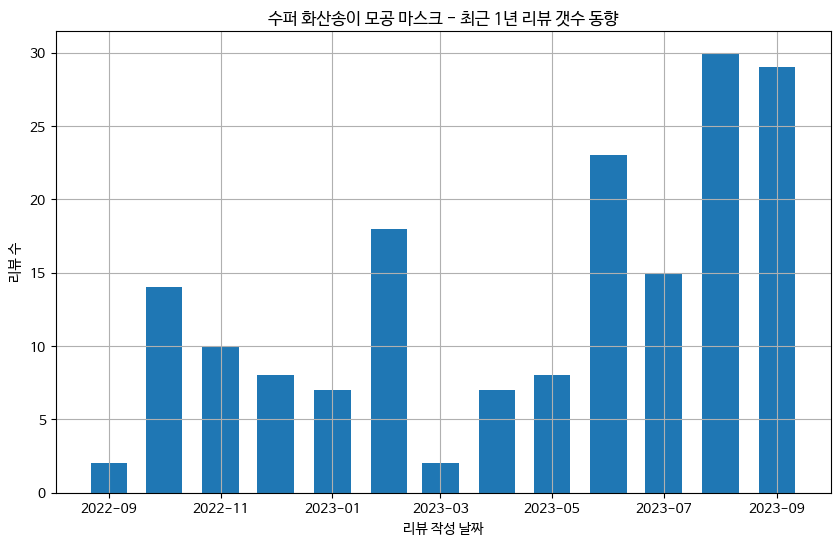


비슷한 상품을 보여드릴까요? (Y/N): y

수퍼 화산송이 모공 마스크과 비슷한 제품 : 
로즈+PHA 리퀴드 마스크 (일치하는 키워드: 여드름, 예민, 보습, 진정, 건성, 탄력, 수분, 쫀쫀, 모공, 각질, 지성, 트러블, 피지, 촉촉)
플라워 앰플 마스크팩 (일치하는 키워드: 여드름, 예민, 보습, 진정, 건성, 탄력, 수분, 쫀쫀, 모공, 각질, 지성, 트러블, 피지, 촉촉)
씨드 앤 스프라우트 에너지 마스크_로터스 5매 20ml*5매 (일치하는 키워드: 여드름, 예민, 보습, 진정, 건성, 탄력, 수분, 쫀쫀, 모공, 각질, 지성, 트러블, 피지, 촉촉)
뉴트리티브 퍼밍 팩 (일치하는 키워드: 여드름, 예민, 보습, 진정, 건성, 탄력, 수분, 쫀쫀, 모공, 각질, 지성, 트러블, 피지, 촉촉)
씨드 앤 스프라우트 에너지 마스크_로터스 세트 30매 (일치하는 키워드: 여드름, 예민, 보습, 진정, 건성, 탄력, 수분, 쫀쫀, 모공, 각질, 지성, 트러블, 촉촉)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q

챗봇을 종료합니다.


In [ ]:
chatbot_with_recommendation(skincare, new_df)

In [13]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156226 sha256=3c9742a6c424666de956790003395d1759cf25824903901356003c3ca9f85c39
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [14]:
# 추천코드

from surprise import Dataset, Reader, SVD, accuracy
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy
from collections import defaultdict

product_rating_avg = skincare.groupby('상품명')['별점'].mean()
product_rating_count = skincare.groupby('상품명').size()

# 가중 평점 계산
m = product_rating_count.quantile(0.6)
C = product_rating_avg.mean()
product_weighted_rating = (product_rating_count / (product_rating_count + m) * product_rating_avg) + (m / (product_rating_count + m) * C)
# 가중 평점을 데이터프레임에 추가
skincare['가중평점'] = skincare['상품명'].map(product_weighted_rating)

# 가상 유저 생성
skincare['가상유저'] = skincare['나이'] + ',' + skincare['성별'] + ',' + skincare['피부타입'] + ',' + skincare['피부트러블']

# 각 가상 유저별 리뷰 계산
user_review_counts = skincare['가상유저'].value_counts()

# 가상 유저와 상품명을 ID로 변환
user_to_id = {user: i for i, user in enumerate(skincare['가상유저'].unique())}
product_to_id = {product: j for j, product in enumerate(skincare['상품명'].unique())}
skincare['user_id'] = skincare['가상유저'].map(user_to_id)
skincare['product_id'] = skincare['상품명'].map(product_to_id)

# 가상 유저별 총 구매횟수를 계산
user_total_purchase_count = skincare.groupby('가상유저').size().reset_index(name='총구매횟수')

# 구매 횟수를 기반으로 10%씩 묶어 클래스를 생성
user_total_purchase_count['구매_클래스'] = pd.qcut(user_total_purchase_count['총구매횟수'], 10, labels=False)

# 원본 데이터에 구매 클래스 정보 추가
skincare = pd.merge(skincare, user_total_purchase_count[['가상유저', '구매_클래스']], on='가상유저', how='left')

train_df, test_df = train_test_split(skincare,test_size=0.2,random_state=SEED,stratify=skincare['구매_클래스'])

# Reader 객체 생성
reader = Reader(rating_scale=(0, 5))

# 학습 데이터와 테스트 데이터를 surprise의 데이터 형식으로 변환
train_data_surprise = Dataset.load_from_df(train_df[['user_id', 'product_id', '가중평점']], reader)
trainset = train_data_surprise.build_full_trainset()

# 테스트 데이터를 surprise의 데이터 형식으로 변환
testset = [(row['user_id'], row['product_id'], row['가중평점']) for i, row in test_df.iterrows()]
best_params = {'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.2}

# SVD 알고리즘 사용하여 모델 학습
model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'],random_state=SEED)
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 평가(RMSE)
rmse = accuracy.rmse(predictions)

id_to_user = {v: k for k, v in user_to_id.items()}
id_to_product = {v: k for k, v in product_to_id.items()}

RMSE: 0.0067


In [21]:
def get_top_n_recommendations(predictions, n=5):
    top_n = {}

    for uid, iid, true_r, est, _ in predictions:
        user_info = id_to_user[uid]
        product_name = id_to_product[iid]

        if user_info not in top_n:
            top_n[user_info] = []

        top_n[user_info].append((product_name, est))

    #정렬, 중복 제거
    for user_info, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        seen = set()
        top_n_without_duplicates = []
        for product_name, est in user_ratings:
            if product_name not in seen:
                seen.add(product_name)
                top_n_without_duplicates.append((product_name, est))

        top_n[user_info] = top_n_without_duplicates[:n]

    return top_n

def get_unrated_items(user, df):
    # 사용자가 평가한 아이템들
    rated_items = set(df[df['가상유저'] == user]['상품명'].tolist())
    # 전체 아이템들
    all_items = set(df['상품명'].tolist())
    # 평가하지 않은 아이템들
    unrated_items = all_items - rated_items
    return unrated_items

user_recommendations_with_rated = get_top_n_recommendations(predictions, n=5)

def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5, weight=0.1):
    # 사용자 정보와 일치하는 리뷰 데이터 필터링
    filtered_df = df[(df['나이'] == age) & (df['성별'] == gender) &
                     (df['피부타입'] == skin_type) & (df['피부트러블'] == skin_trouble)]

    # 상품별 평균 별점 계산
    product_rating_avg = filtered_df.groupby('상품명')['별점'].mean().reset_index()

    # 가중치 적용: 일치하는 특성이 있을 경우, 가중치를 더한다.
    feature_values = {'나이': age, '성별': gender, '피부타입': skin_type, '피부트러블': skin_trouble}
    for feature, feature_value in feature_values.items():
        feature_weight = filtered_df[filtered_df[feature] == feature_value].groupby('상품명')['별점'].count() * weight
        product_rating_avg = pd.merge(product_rating_avg, feature_weight.reset_index().rename(columns={'별점': f'{feature}_weight'}), on='상품명', how='left')

    # 최종 점수 계산 (평균 별점 + 가중치 합)
    product_rating_avg['final_score'] = product_rating_avg['별점'] + product_rating_avg[[f'{feature}_weight' for feature in ['나이', '성별', '피부타입', '피부트러블']]].sum(axis=1)

    # 최종 점수가 높은 상위 N개의 상품 추천
    recommended_products = product_rating_avg.sort_values(by='final_score', ascending=False).head(top_n)['상품명'].tolist()

    return recommended_products

def recommend_products_for_user(df, top_n=5):
    age = input("\n연령대를 입력하세요 (10대, 20대, 30대, 40대, 50대 이상): ")
    gender = input("\n성별을 입력하세요 (여성, 남성): ")
    skin_type = input("\n피부 타입을 입력하세요 (지성, 건성, 복합성, 수분부족지성, 중성, 극건성): ")
    skin_trouble = input("\n피부 고민을 입력하세요 (모공, 건조함, 트러블, 민감성, 탄력없음, 칙칙함, 주름, 복합성): ")
    product_category = input("\n카테고리를 입력하세요 (에센스 & 세럼, 로션 & 에멀젼, 스킨 & 토너, 크림, 아이 & 넥, 미스트, 선블럭, 선스틱, \n마스크 & 팩, 페이스 오일, 앰플, 메이크업 리무버, 클렌징 티슈, 클렌징 오일, 클렌징 워터, 클렌징 폼, 필링 & 스크럽): ")

    # 가상 유저 ID를 생성
    virtual_user = f"{age},{gender},{skin_type},{skin_trouble}"

    # 가상 유저의 리뷰 수 확인
    user_review_count = df[df['가상유저'] == virtual_user].shape[0]

    # 가상유저별 총 구매횟수를 계산
    user_total_purchase_count = df.groupby('가상유저').size().reset_index(name='총구매횟수')

    # 구매횟수 상위 20%에 해당하는 임계값을 계산
    heavy_user_threshold = user_total_purchase_count['총구매횟수'].quantile(0.8)

    # 리뷰 수 상위 20% 이하인 경우 라이트 유저로 판단
    if user_review_count <= heavy_user_threshold:
        # 사용자가 입력한 카테고리를 기반으로 상품 추천
        recommended_products = recommend_products_by_category(df, product_category, top_n=top_n)
        return recommended_products
    else:
        user_id = user_to_id[virtual_user]
        # CF 기반 추천 수행
        user_recommendations = user_recommendations_with_rated.get(virtual_user, [])
        recommended_products = [product_name for product_name, _ in user_recommendations[:top_n]]
        return recommended_products

# 상품 카테고리를 기반으로 상품 추천하는 함수
def recommend_products_by_category(df, category, top_n=5):
    # 카테고리에 해당하는 상품 필터링
    filtered_df = df[df['상품소분류'] == category]

    # 필터링된 상품들의 가중평점 평균 계산
    product_rating_avg = filtered_df.groupby('상품명')['가중평점'].mean().reset_index()

    # 가중평점 평균 기준으로 상위 N개 상품 추출
    recommended_products = product_rating_avg.sort_values(by='가중평점', ascending=False).head(top_n)['상품명'].tolist()

    return recommended_products

In [30]:
recommend_products_for_user(skincare)


연령대를 입력하세요 (10대, 20대, 30대, 40대, 50대 이상): 10대

성별을 입력하세요 (여성, 남성): 여성

피부 타입을 입력하세요 (지성, 건성, 복합성, 수분부족지성, 중성, 극건성): 지성

피부 고민을 입력하세요 (모공, 건조함, 트러블, 민감성, 탄력없음, 칙칙함, 주름, 복합성): 트러블

카테고리를 입력하세요 (에센스 & 세럼, 로션 & 에멀젼, 스킨 & 토너, 크림, 아이 & 넥, 미스트, 선블럭, 선스틱, 
마스크 & 팩, 페이스 오일, 앰플, 메이크업 리무버, 클렌징 티슈, 클렌징 오일, 클렌징 워터, 클렌징 폼, 필링 & 스크럽): 크림


['아토베리어365 크림',
 '자음생아이크림',
 '알파인베리 워터리 크림',
 '알파인 베리 워터리 수딩 젤크림',
 '모이스춰 플럼핑 넥타 크림']

In [24]:
def chatbot(df, new_df):
  while True:
      print("\n1. 제품 추천 받기")
      print("2. 상품 리뷰 확인하기")
      print("3. 종료")

      choice = input("\n원하는 작업을 선택하세요 (1/2/3): ")

      if choice == '1':
          # 추천 상품 리스트 받기
          recommended_products = recommend_products_for_user(df)
          # 추천 상품 리스트 출력
          print("\n추천 상품 목록:")
          for i, product in enumerate(recommended_products, start=1):
              print(f"{i}. {product}")
      elif choice == '2':
          chatbot_with_recommendation(df, new_df)
      elif choice == '3':
          print("프로그램을 종료합니다.")
          break
      else:
          print("올바른 선택지를 입력하세요.")


1. 제품 추천 받기
2. 상품 리뷰 확인하기
3. 종료

원하는 작업을 선택하세요 (1/2/3): 1

연령대를 입력하세요 (10대, 20대, 30대, 40대, 50대 이상): 10대

성별을 입력하세요 (여성, 남성): 여성

피부 타입을 입력하세요 (지성, 건성, 복합성, 수분부족지성, 중성, 극건성): 지성

피부 고민을 입력하세요 (모공, 건조함, 트러블, 민감성, 탄력없음, 칙칙함, 주름, 복합성): 트러블

카테고리를 입력하세요 (에센스 & 세럼, 로션 & 에멀젼, 스킨 & 토너, 크림, 아이 & 넥, 미스트, 선블럭, 선스틱, 
마스크 & 팩, 페이스 오일, 앰플, 메이크업 리무버, 클렌징 티슈, 클렌징 오일, 클렌징 워터, 클렌징 폼, 필링 & 스크럽): 크림

추천 상품 목록:
1. 아토베리어365 크림
2. 자음생아이크림
3. 알파인베리 워터리 크림
4. 알파인 베리 워터리 수딩 젤크림
5. 모이스춰 플럼핑 넥타 크림

1. 제품 추천 받기
2. 상품 리뷰 확인하기
3. 종료

원하는 작업을 선택하세요 (1/2/3): 2

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): 알파인

일치하는 상품명 목록:
1. 알파인베리 워터리 크림
2. 알파인 베리 워터리 크림
3. 알파인 베리 워터리 수딩 젤크림
4. 알파인 베리 워터리 수딩젤 크림
5. 알파인베리 워터리 수딩젤 크림

상품을 선택하세요 (번호 입력): 1

알파인베리 워터리 크림의 전체 리뷰 요약: 몇 번째 재구매인지 모를 정도로 항상 프리메라 워터리 크림 사용하고 있는데 수분크림 유목민이었는데 친구추천으로 알게되어 수분크림은 프리메라 알파인 베리 워터리크림에 정착했고 이 제품 만나고 다른 수분 크림으로 갈아탔다.

이 제품은 40대, 복합성이면서 민감성 고민을 가진 사람들이 많이 쓰는 제품입니다.


<ipython-input-12-b8fd20e5afa6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['리뷰작성날짜'] = pd.to_datetime(review['리뷰작성날짜'], format='%Y-%m-%d', errors='coerce')


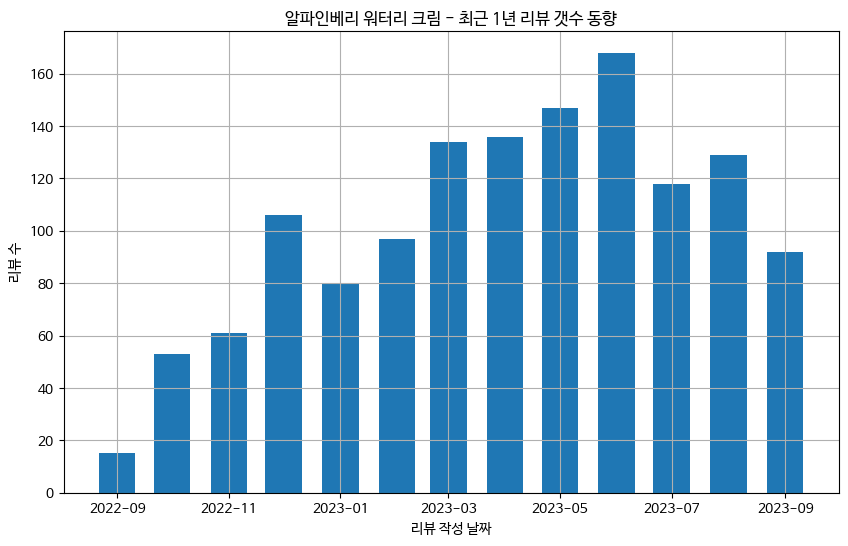


비슷한 상품을 보여드릴까요? (Y/N): y

알파인베리 워터리 크림과 비슷한 제품 : 
래디언씨 크림 (일치하는 키워드: 트러블, 촉촉, 산뜻, 수분, 각질, 예민, 보습, 잡티, 피지, 쫀쫀, 탄력, 건성, 모공, 주름, 지성, 여드름, 진정)
워터뱅크 블루 히알루로닉 크림 중·건성용 (일치하는 키워드: 트러블, 촉촉, 산뜻, 수분, 각질, 예민, 보습, 피지, 쫀쫀, 탄력, 건성, 모공, 주름, 지성, 여드름, 진정)
바쿠치올 레티놀 크림 (일치하는 키워드: 트러블, 촉촉, 산뜻, 수분, 각질, 예민, 보습, 피지, 모공, 탄력, 건성, 쫀쫀, 주름, 지성, 여드름, 진정)
블루 캐모마일 크림 (일치하는 키워드: 트러블, 촉촉, 산뜻, 수분, 각질, 예민, 보습, 피지, 쫀쫀, 탄력, 건성, 모공, 주름, 지성, 여드름, 진정)
프로바이오틱스 세라마이드 크림 (일치하는 키워드: 트러블, 촉촉, 산뜻, 수분, 각질, 예민, 보습, 피지, 쫀쫀, 탄력, 건성, 모공, 주름, 지성, 여드름, 진정)

상품명을 입력하세요 (종료하려면 'q' 또는 'quit' 입력): q

챗봇을 종료합니다.

1. 제품 추천 받기
2. 상품 리뷰 확인하기
3. 종료

원하는 작업을 선택하세요 (1/2/3): 3
프로그램을 종료합니다.


In [31]:
chatbot(skincare, new_df)